In [1]:
import pandas as pd 
import numpy as np
import toolbox_ML as tb 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
path = "./dataset_definitivo/dataset_definitivo.csv"
df = pd.read_csv(path)

In [3]:
df

,MES_DENUNCIA,ANIO_DENUNCIA,MES_FIRMEZA,TIPO_ORGANISMO,CUANTIA,PUNTOS,SEXO,NOVEL,EDAD,TIPO_INFRACCION,PROVINCIA_TRAMITE,NUM_INFRACCIONES
0,1,2018,4,Ayuntamientos,200.0,3,V,NO,De 45 a 54 años,6.-Otros,Barcelona,1
1,1,2018,9,Ayuntamientos,200.0,3,M,NO,De 35 a 44 años,3.-Tlfn. móvil,Girona,1
2,1,2020,2,Ayuntamientos,200.0,3,V,NO,De 45 a 54 años,3.-Tlfn. móvil,Barcelona,1
3,1,2020,5,Ayuntamientos,200.0,4,V,NO,De 25 a 34 años,6.-Otros,Girona,1
4,1,2020,12,Ayuntamientos,200.0,3,V,NO,De 55 a 64 años,3.-Tlfn. móvil,Girona,1
...,...,...,...,...,...,...,...,...,...,...,...,...
315229,12,2023,12,Servei Catalán de Tráfico,500.0,6,V,NO,De 55 a 64 años,2.-Velocidad,Tarragona,1
315230,12,2023,12,Servei Catalán de Tráfico,500.0,6,V,NO,De 55 a 64 años,6.-Otros,Barcelona,1
315231,12,2023,12,Servei Catalán de Tráfico,500.0,6,V,NO,De 65 a 74 años,6.-Otros,Barcelona,1
315232,12,2023,12,Servei Catalán de Tráfico,500.0,6,V,SI,Hasta 24 años,6.-Otros,Girona,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315234 entries, 0 to 315233
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MES_DENUNCIA       315234 non-null  int64  
 1   ANIO_DENUNCIA      315234 non-null  int64  
 2   MES_FIRMEZA        315234 non-null  int64  
 3   TIPO_ORGANISMO     315234 non-null  object 
 4   CUANTIA            315234 non-null  float64
 5   PUNTOS             315234 non-null  int64  
 6   SEXO               315234 non-null  object 
 7   NOVEL              315234 non-null  object 
 8   EDAD               315234 non-null  object 
 9   TIPO_INFRACCION    315234 non-null  object 
 10  PROVINCIA_TRAMITE  315234 non-null  object 
 11  NUM_INFRACCIONES   315234 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 28.9+ MB


In [5]:
df.describe()

,MES_DENUNCIA,ANIO_DENUNCIA,MES_FIRMEZA,CUANTIA,PUNTOS,NUM_INFRACCIONES
count,315234.000000,315234.000000,315234.000000,315234.000000,315234.000000,315234.000000
mean,6.429433,2022.729195,6.591132,383.352246,4.020978,3.341622
std,3.358734,0.470817,3.423020,259.215915,1.447564,7.532732
min,1.000000,2014.000000,1.000000,0.000000,2.000000,1.000000
25%,4.000000,2022.000000,4.000000,200.000000,3.000000,1.000000
50%,6.000000,2023.000000,7.000000,300.000000,4.000000,1.000000
75%,9.000000,2023.000000,10.000000,500.000000,6.000000,3.000000
max,12.000000,2023.000000,12.000000,6000.000000,6.000000,304.000000


In [6]:
tb.describe_df(df)

,COL_N,MES_DENUNCIA,ANIO_DENUNCIA,MES_FIRMEZA,TIPO_ORGANISMO,CUANTIA,PUNTOS,SEXO,NOVEL,EDAD,TIPO_INFRACCION,PROVINCIA_TRAMITE,NUM_INFRACCIONES
0,DATA_TYPE,int64,int64,int64,object,float64,int64,object,object,object,object,object,int64
1,MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,UNIQUE_VALUES,12,10,12,4,24,4,2,2,7,6,52,203
3,CARDIN (%),0.003807,0.003172,0.003807,0.001269,0.007613,0.001269,0.000634,0.000634,0.002221,0.001903,0.016496,0.064397


Voy a crear un modelo de riesgo de conductor. Por ejemplo para una aseguradora de vehiculos. Para ello voy a crear una variable nueva usando la cuantia y el numero de infracciones. 

In [7]:
# Calcular percentil 80

p80_infracciones = df["NUM_INFRACCIONES"].quantile(0.80)
p80_cuantia = df["CUANTIA"].quantile(0.80)

print("Percentil 80 - NUM_INFRACCIONES:", p80_infracciones)
print("Percentil 80 - CUANTIA:", p80_cuantia)

Percentil 80 - NUM_INFRACCIONES: 4.0
Percentil 80 - CUANTIA: 500.0


In [8]:
df["ALTO_RIESGO"] = np.where(
    (df["NUM_INFRACCIONES"] >= p80_infracciones) |
    (df["CUANTIA"] >= p80_cuantia),
    1,
    0
)

# Ver distribución
print(df["ALTO_RIESGO"].value_counts())
print(df["ALTO_RIESGO"].value_counts(normalize=True))

ALTO_RIESGO
0    176810
1    138424
Name: count, dtype: int64
ALTO_RIESGO
0    0.560885
1    0.439115
Name: proportion, dtype: float64


In [9]:
df[["NUM_INFRACCIONES", "CUANTIA", "ALTO_RIESGO"]].head()

,NUM_INFRACCIONES,CUANTIA,ALTO_RIESGO
0,1,200.0,0
1,1,200.0,0
2,1,200.0,0
3,1,200.0,0
4,1,200.0,0


In [10]:
X = df.drop(columns=["ALTO_RIESGO"])
y = df["ALTO_RIESGO"]

# Split estratificado 
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

print("\nDistribución target en train:")
print(y_train.value_counts(normalize=True))

print("\nDistribución target en test:")
print(y_test.value_counts(normalize=True))

Train size: (252187, 12)
Test size: (63047, 12)

Distribución target en train:
ALTO_RIESGO
0    0.560885
1    0.439115
Name: proportion, dtype: float64

Distribución target en test:
ALTO_RIESGO
0    0.560883
1    0.439117
Name: proportion, dtype: float64


In [11]:
# MiniEda
train = X_train.copy()
train["ALTO_RIESGO"] = y_train

In [12]:
train.describe()

,MES_DENUNCIA,ANIO_DENUNCIA,MES_FIRMEZA,CUANTIA,PUNTOS,NUM_INFRACCIONES,ALTO_RIESGO
count,252187.000000,252187.000000,252187.000000,252187.000000,252187.000000,252187.000000,252187.000000
mean,6.427667,2022.728761,6.587195,383.322622,4.020334,3.340133,0.439115
std,3.357810,0.471472,3.422475,259.159129,1.446885,7.518011,0.496280
min,1.000000,2014.000000,1.000000,0.000000,2.000000,1.000000,0.000000
25%,4.000000,2022.000000,4.000000,200.000000,3.000000,1.000000,0.000000
50%,6.000000,2023.000000,7.000000,300.000000,4.000000,1.000000,0.000000
75%,9.000000,2023.000000,10.000000,500.000000,6.000000,3.000000,1.000000
max,12.000000,2023.000000,12.000000,6000.000000,6.000000,288.000000,1.000000


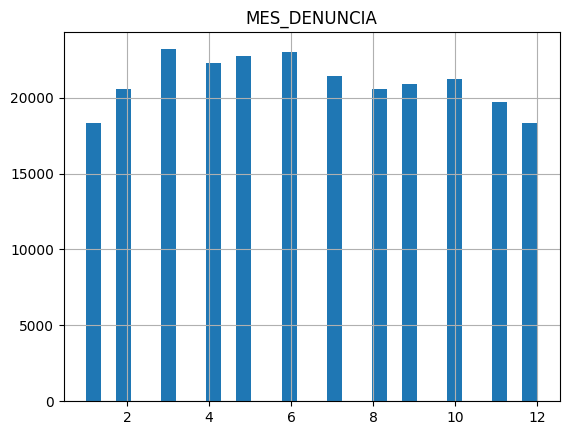

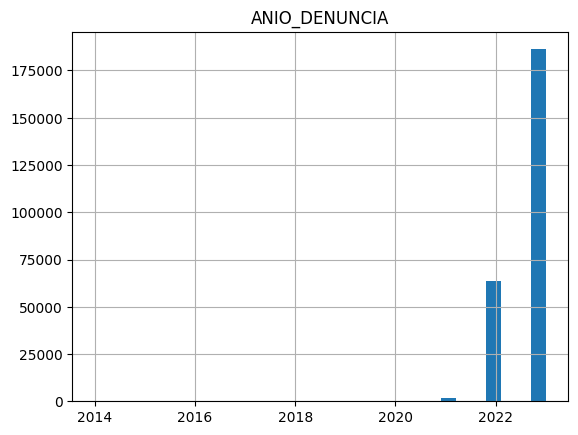

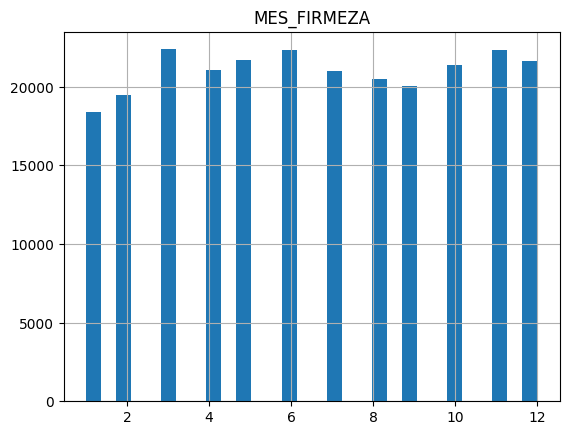

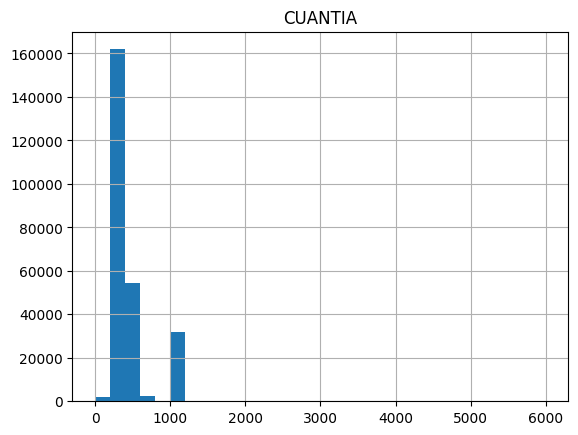

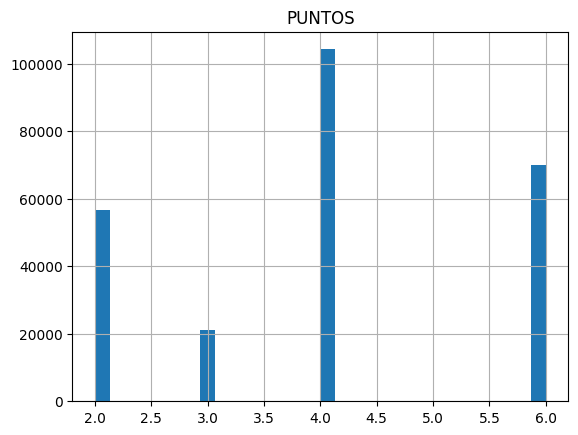

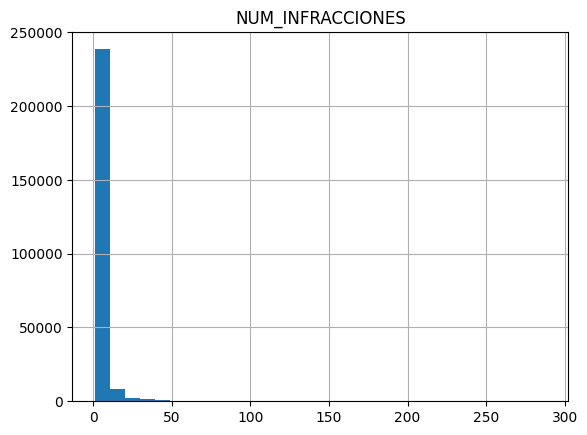

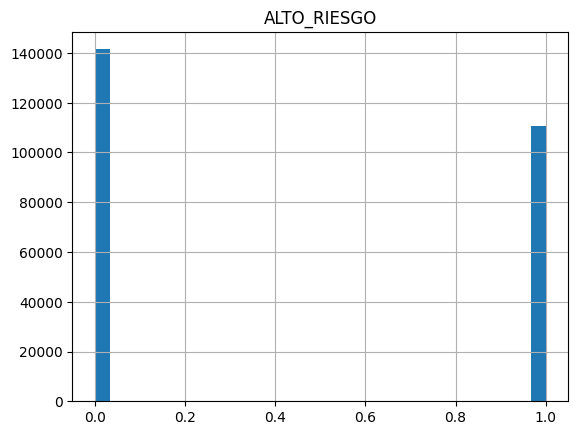

In [13]:
num_cols = train.select_dtypes(include=["int64", "float64"]).columns

for col in num_cols:
    plt.figure()
    train[col].hist(bins=30)
    plt.title(col)
    plt.show()

In [14]:
corr = train.corr(numeric_only=True)
corr["ALTO_RIESGO"].sort_values(ascending=False)

ALTO_RIESGO         1.000000
CUANTIA             0.587235
PUNTOS              0.321911
NUM_INFRACCIONES    0.288927
ANIO_DENUNCIA       0.121032
MES_FIRMEZA         0.015947
MES_DENUNCIA       -0.009179
Name: ALTO_RIESGO, dtype: float64

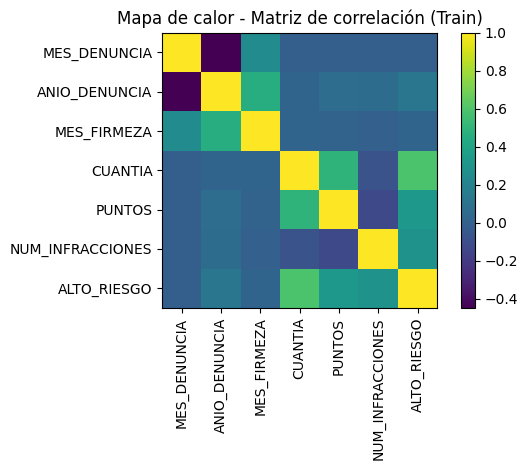

In [15]:
# Heatmap
plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Mapa de calor - Matriz de correlación (Train)")
plt.tight_layout()
plt.show()

C:\Users\rukas\AppData\Local\Temp\ipykernel_29384\972787660.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(prop.index.astype(str), rotation=45)
C:\Users\rukas\AppData\Local\Temp\ipykernel_29384\972787660.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(prop.index.astype(str), rotation=45)
C:\Users\rukas\AppData\Local\Temp\ipykernel_29384\972787660.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(prop.index.astype(str), rotation=45)
C:\Users\rukas\AppData\Local\Temp\ipykernel_29384\972787660.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(prop.

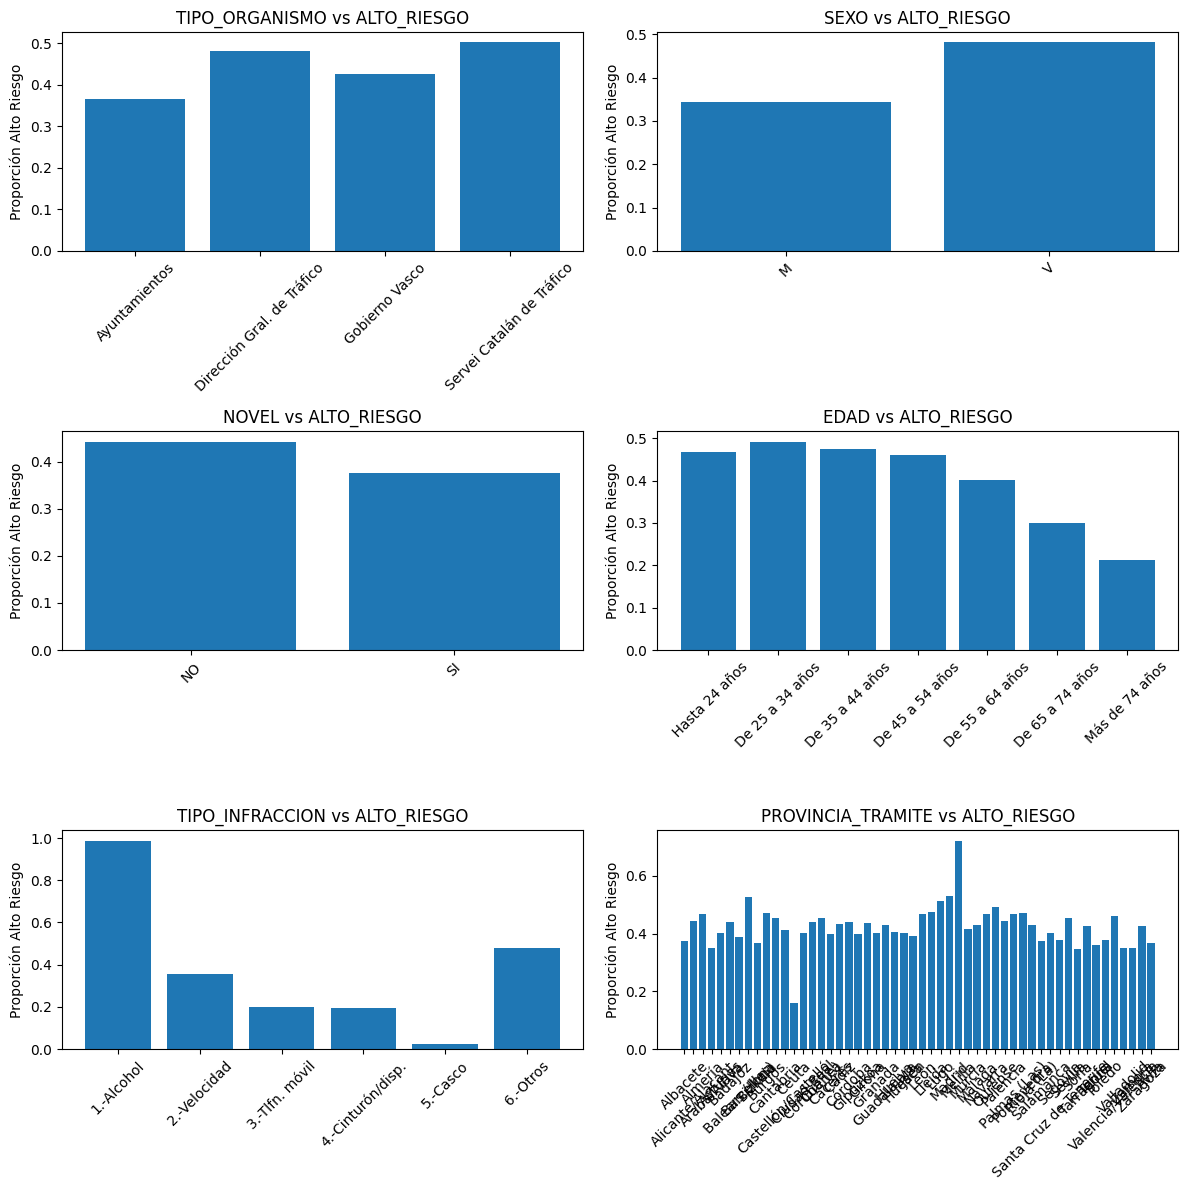

In [16]:
# Seleccionamos columnas categóricas
cat_cols = train.select_dtypes(include=["object"]).columns

n_cols = 2
n_rows = int(np.ceil(len(cat_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))

axes = axes.flatten()

for i, col in enumerate(cat_cols):
    
    # Tabla de proporciones de alto riesgo por categoría
    prop = pd.crosstab(
        train[col],
        train["ALTO_RIESGO"],
        normalize="index"
    )[1]
    
    axes[i].bar(prop.index.astype(str), prop.values)
    axes[i].set_title(f"{col} vs ALTO_RIESGO")
    axes[i].set_ylabel("Proporción Alto Riesgo")
    axes[i].set_xticklabels(prop.index.astype(str), rotation=45)

# Si sobran ejes, los ocultamos
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

**Features que si que me quedo**
- EDAD
- SEXO
- NOVEL
- PROVINCIA_TRAMITE
- TIPO_ORGANISMO
- MES_DENUNCIA

**Features que no que me quedo**
- NUM_INFRACCIONES
- CUANTIA
- PUNTOS
- TIPO_INFRACCION (en primera versión)
- MES_FIRMEZA

In [17]:
# Features seleccionadas

In [18]:
features = [
    "EDAD",
    "SEXO",
    "NOVEL",
    "PROVINCIA_TRAMITE",
    "TIPO_ORGANISMO",
    "MES_DENUNCIA"
]

X_train_sel = X_train[features].copy()
X_test_sel = X_test[features].copy()

print("Train shape:", X_train_sel.shape)
print("Test shape:", X_test_sel.shape)

Train shape: (252187, 6)
Test shape: (63047, 6)


In [19]:
# Voy a pasar las provincias a comunidades para reducir el volumen.

prov_to_ccaa = {
    "Álava": "País Vasco",
    "Albacete": "Castilla-La Mancha",
    "Alicante": "Comunidad Valenciana",
    "Almería": "Andalucía",
    "Asturias": "Asturias",
    "Ávila": "Castilla y León",
    "Badajoz": "Extremadura",
    "Barcelona": "Cataluña",
    "Burgos": "Castilla y León",
    "Cáceres": "Extremadura",
    "Cádiz": "Andalucía",
    "Cantabria": "Cantabria",
    "Castellón": "Comunidad Valenciana",
    "Ciudad Real": "Castilla-La Mancha",
    "Córdoba": "Andalucía",
    "Cuenca": "Castilla-La Mancha",
    "Girona": "Cataluña",
    "Granada": "Andalucía",
    "Guadalajara": "Castilla-La Mancha",
    "Guipúzcoa": "País Vasco",
    "Huelva": "Andalucía",
    "Huesca": "Aragón",
    "Illes Balears": "Islas Baleares",
    "Jaén": "Andalucía",
    "La Coruña": "Galicia",
    "La Rioja": "La Rioja",
    "Las Palmas": "Canarias",
    "León": "Castilla y León",
    "Lleida": "Cataluña",
    "Lugo": "Galicia",
    "Madrid": "Madrid",
    "Málaga": "Andalucía",
    "Murcia": "Murcia",
    "Navarra": "Navarra",
    "Ourense": "Galicia",
    "Palencia": "Castilla y León",
    "Pontevedra": "Galicia",
    "Salamanca": "Castilla y León",
    "Santa Cruz de Tenerife": "Canarias",
    "Segovia": "Castilla y León",
    "Sevilla": "Andalucía",
    "Soria": "Castilla y León",
    "Tarragona": "Cataluña",
    "Teruel": "Aragón",
    "Toledo": "Castilla-La Mancha",
    "Valencia": "Comunidad Valenciana",
    "Valladolid": "Castilla y León",
    "Vizcaya": "País Vasco",
    "Zamora": "Castilla y León",
    "Zaragoza": "Aragón",
    "Ceuta": "Ceuta",
    "Melilla": "Melilla"
}

def provincia_to_ccaa(X):
    X = X.copy()
    X["PROVINCIA_TRAMITE"] = X["PROVINCIA_TRAMITE"].map(prov_to_ccaa)
    return X

In [20]:
# Identificar tipos
num_cols = ["MES_DENUNCIA"]
cat_cols = ["EDAD", "SEXO", "NOVEL", "PROVINCIA_TRAMITE", "TIPO_ORGANISMO"]

In [21]:
# Pipeline

# Preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

# Pipeline completo
pipeline_lr = Pipeline(steps=[
    ("prov_to_ccaa", FunctionTransformer(provincia_to_ccaa)),
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

In [35]:
pipeline_lr.fit(X_train_sel, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('prov_to_ccaa', ...), ('preprocessor', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"func func: callable, default=NoneThe callable to use for the transformation. This will be passedthe same arguments as transform, with args and kwargs forwarded.If func is None, then func will be the identity function.",<function pro...001C10B48B240>
,"inverse_func inverse_func: callable, default=NoneThe callable to use for the inverse transformation. This will bepassed the same arguments as inverse transform, with args andkwargs forwarded. If inverse_func is None, then inverse_funcwill be the identity function.",None
,"validate validate: bool, default=FalseIndicate that the input X array should be checked before calling``func``. The possibilities are:- If False, there is no input validation.- If True, then X will be converted to a 2-dimensional NumPy array or sparse matrix. If the conversion is not possible an exception is raised... versionchanged:: 0.22 The default of ``validate`` changed from True to False.",False
,"accept_sparse accept_sparse: bool, default=FalseIndicate that func accepts a sparse matrix as input. If validate isFalse, this has no effect. Otherwise, if accept_sparse is false,sparse matrix inputs will cause an exception to be raised.",False
,"check_inverse check_inverse: bool, default=TrueWhether to check that or ``func`` followed by ``inverse_func`` leads tothe original inputs. It can be used for a sanity check, raising awarning when the condition is not fulfilled... versionadded:: 0.20",True
,"feature_names_out feature_names_out: callable, 'one-to-one' or None, default=NoneDetermines the list of feature names that will be returned by the`get_feature_names_out` method. If it is 'one-to-one', then the outputfeature names will be equal to the input feature names. If it is acallable, then it must take two positional arguments: this`FunctionTransformer` (`self`) and an array-like of input feature names(`input_features`). It must return an array-like of output featurenames. The `get_feature_names_out` method is only defined if`feature_names_out` is not None.See ``get_feature_names_out`` for more details... versionadded:: 1.1",None
,"kw_args kw_args: dict, default=NoneDictionary of additional keyword argume

In [ ]:
# Si no me equivoco, con proba ves la probabilidad de que ese fila pertenezca o no. En este caso es la probabilidad de que sea 1 o 0. 

y_proba = pipeline_lr.predict_proba(X_test_sel)[:, 1]

print(y_proba[:10])

[0.50209393 0.21928333 0.55984438 0.34357201 0.49534921 0.53190528
 0.57296961 0.50483032 0.30041564 0.41428633]


In [45]:
# En este caso el primer elemento tiene un 50% de probabilidad de que se 1, el segundo tiene un 21%, el tercero un 55%, etc.

In [37]:
y_train_proba = pipeline_lr.predict_proba(X_train_sel)[:, 1]
y_test_proba = pipeline_lr.predict_proba(X_test_sel)[:, 1]

In [38]:
auc_train = roc_auc_score(y_train, y_train_proba)
auc_test = roc_auc_score(y_test, y_test_proba)

print(f"AUC Train: {auc_train:.4f}")
print(f"AUC Test:  {auc_test:.4f}")

AUC Train: 0.6482
AUC Test:  0.6485


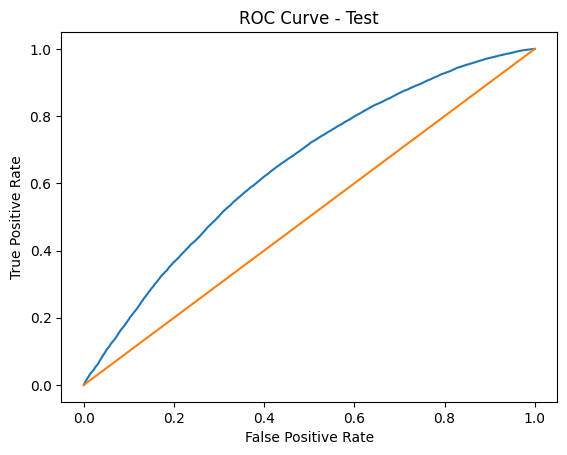

In [26]:
fpr, tpr, _ = roc_curve(y_test, y_test_proba)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Test")
plt.show()

In [40]:
y_proba_df = pd.DataFrame({
    'y_proba': y_proba
})

y_proba_df['risk_group'] = pd.qcut(
    y_proba_df['y_proba'],
    q=3,  # terciles
    labels=['Bajo Riesgo', 'Medio Riesgo', 'Alto Riesgo']
)

In [41]:
y_proba_df

,y_proba,risk_group
0,0.502094,Medio Riesgo
1,0.219283,Bajo Riesgo
2,0.559844,Alto Riesgo
3,0.343572,Bajo Riesgo
4,0.495349,Medio Riesgo
...,...,...
63042,0.423382,Medio Riesgo
63043,0.284394,Bajo Riesgo
63044,0.410308,Medio Riesgo
63045,0.426272,Medio Riesgo


In [ ]:
# Como proba me da un valor entre 0 y 1 he podido darle un grupo dependiendo del valor. (Bajo, Media y Alto)
# Ahora reconstuire el DF añadiendo esa categoria. 

X_test_with_risk = X_test.copy()  # Copia para no modificar el original
X_test_with_risk["ALTO_RIESGO"] = y_test.values
X_test_with_risk['risk_group'] = y_proba_df['risk_group'].values
# Mostrar ejemplo
X_test_with_risk.head(10)

,MES_DENUNCIA,ANIO_DENUNCIA,MES_FIRMEZA,TIPO_ORGANISMO,CUANTIA,PUNTOS,SEXO,NOVEL,EDAD,TIPO_INFRACCION,PROVINCIA_TRAMITE,NUM_INFRACCIONES,ALTO_RIESGO,risk_group
266969,10,2023,12,Dirección Gral. de Tráfico,300.0,2,V,NO,De 55 a 64 años,2.-Velocidad,Castellón/Castelló,11,1,Medio Riesgo
202516,8,2023,9,Ayuntamientos,200.0,3,M,NO,De 45 a 54 años,3.-Tlfn. móvil,Ciudad Real,1,0,Bajo Riesgo
55520,3,2023,3,Dirección Gral. de Tráfico,500.0,4,V,NO,De 45 a 54 años,1.-Alcohol,Cádiz,18,1,Alto Riesgo
105716,5,2022,1,Ayuntamientos,300.0,2,V,NO,De 55 a 64 años,2.-Velocidad,Valencia/València,1,0,Bajo Riesgo
40217,2,2023,5,Dirección Gral. de Tráfico,300.0,2,V,NO,De 55 a 64 años,2.-Velocidad,Jaén,3,0,Medio Riesgo
141989,6,2023,6,Dirección Gral. de Tráfico,200.0,4,V,NO,De 35 a 44 años,6.-Otros,Toledo,7,1,Alto Riesgo
222850,9,2022,7,Ayuntamientos,200.0,4,V,NO,De 25 a 34 años,6.-Otros,Barcelona,14,1,Alto Riesgo
206399,8,2023,9,Dirección Gral. de Tráfico,300.0,2,V,NO,De 55 a 64 años,2.-Velocidad,Castellón/Castelló,48,1,Medio Riesgo
22706,1,2023,12,Ayuntamientos,300.0,2,M,NO,De 25 a 34 años,2.-Velocidad,Coruña (A),2,0,Bajo Riesgo
173268,7,2023,7,Dirección Gral. de Tráfico,500.0,4,M,NO,De 35 a 44 años,1.-Alcohol,Cádiz,5,1,Medio Riesgo


In [27]:
# Extraer los coeficientes del modelo. 

# Extraer modelo entrenado
model = pipeline_lr.named_steps['model']  

# Obtener nombres de las variables después del preprocesado
feature_names = pipeline_lr.named_steps['preprocessor'].get_feature_names_out()

# Coeficientes
coefs = model.coef_[0]

# Crear dataframe ordenado
coef_df = pd.DataFrame({
    'feature': feature_names,
    'coef': coefs,
    'odds_ratio': np.exp(coefs)
})

coef_df = coef_df.sort_values(by='coef', ascending=False)

coef_df.head(15)

,feature,coef,odds_ratio
23,cat__PROVINCIA_TRAMITE_Madrid,0.717996,2.050321
19,cat__PROVINCIA_TRAMITE_Cataluña,0.606144,1.833349
2,cat__EDAD_De 25 a 34 años,0.372012,1.450650
3,cat__EDAD_De 35 a 44 años,0.291503,1.338437
1,cat__EDAD_ Hasta 24 años,0.284440,1.329018
29,cat__TIPO_ORGANISMO_Dirección Gral. de Tráfico,0.271354,1.311739
22,cat__PROVINCIA_TRAMITE_Galicia,0.265138,1.303610
4,cat__EDAD_De 45 a 54 años,0.222189,1.248808
26,cat__PROVINCIA_TRAMITE_Navarra,0.221507,1.247956
24,cat__PROVINCIA_TRAMITE_Melilla,0.193479,1.213463


In [28]:
coef_df['abs_coef'] = np.abs(coef_df['coef'])
coef_df.sort_values(by='abs_coef', ascending=False).head(15)

,feature,coef,odds_ratio,abs_coef
20,cat__PROVINCIA_TRAMITE_Ceuta,-1.587933,0.204348,1.587933
7,cat__EDAD_Más de 74 años,-1.042416,0.352602,1.042416
23,cat__PROVINCIA_TRAMITE_Madrid,0.717996,2.050321,0.717996
19,cat__PROVINCIA_TRAMITE_Cataluña,0.606144,1.833349,0.606144
8,cat__SEXO_M,-0.535395,0.585438,0.535395
11,cat__NOVEL_SI,-0.522125,0.593259,0.522125
6,cat__EDAD_De 65 a 74 años,-0.521875,0.593407,0.521875
28,cat__TIPO_ORGANISMO_Ayuntamientos,-0.411803,0.662455,0.411803
2,cat__EDAD_De 25 a 34 años,0.372012,1.450650,0.372012
13,cat__PROVINCIA_TRAMITE_Aragón,-0.291801,0.746917,0.291801


abs_coef = magnitud del impacto  
coef = dirección del impacto  

Primero miramos abs_coef para saber qué variables mandan.  
Luego miramos el signo para entender si suben o bajan riesgo.  

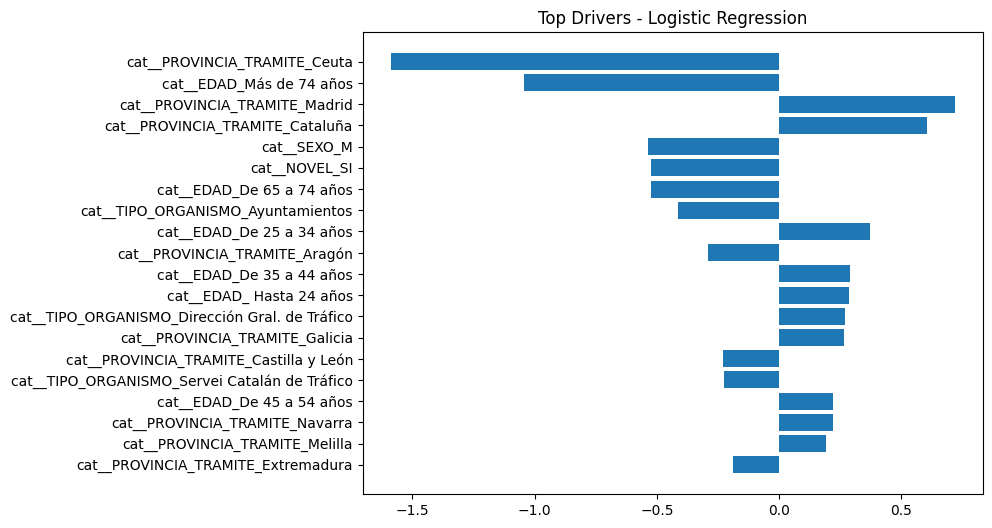

In [30]:
top = coef_df.sort_values(by='abs_coef', ascending=False).head(20)

plt.figure(figsize=(8,6))
plt.barh(top['feature'], top['coef'])
plt.gca().invert_yaxis()
plt.title("Top Drivers - Logistic Regression")
plt.show()

In [31]:
# Ahora voy a calcular la importancia agregada por variable (Sumando dummies)

# Asegurarnos de tener abs_coef
coef_df['abs_coef'] = np.abs(coef_df['coef'])

# Extraer nombre de variable original
coef_df['variable'] = coef_df['feature'].apply(lambda x: x.split('__')[1].split('_')[0])

# Agrupar y sumar importancia
importance_agg = (
    coef_df.groupby('variable')['abs_coef']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

importance_agg

,variable,abs_coef
0,PROVINCIA,4.654982
1,EDAD,2.776853
2,TIPO,0.979274
3,SEXO,0.634225
4,NOVEL,0.607684
5,MES,0.018377


In [32]:
# Voy a probar otro modelo sin provincias. 

categorical_cols_no_prov = ['EDAD', 'SEXO', 'NOVEL', 'TIPO_ORGANISMO']

In [33]:
preprocessor_no_prov = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols_no_prov)
    ]
)

pipe_lr_no_prov = Pipeline(steps=[
    ('preprocessor', preprocessor_no_prov),
    ('model', LogisticRegression(max_iter=1000))
])

In [34]:
pipe_lr_no_prov.fit(X_train[categorical_cols_no_prov], y_train)

y_train_pred = pipe_lr_no_prov.predict_proba(X_train[categorical_cols_no_prov])[:,1]
y_test_pred = pipe_lr_no_prov.predict_proba(X_test[categorical_cols_no_prov])[:,1]

auc_train_no_prov = roc_auc_score(y_train, y_train_pred)
auc_test_no_prov = roc_auc_score(y_test, y_test_pred)

print("AUC Train sin provincia:", round(auc_train_no_prov,4))
print("AUC Test sin provincia: ", round(auc_test_no_prov,4))

AUC Train sin provincia: 0.6299
AUC Test sin provincia:  0.63
